In [1]:
from monte_carlo import *
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
ndim = 2
nsamples = 1000

target = densities.Camel(ndim)
# add .count attributes to pdf and pot_gradient methods
util.count_calls(target, 'pdf', 'pot_gradient')
start = np.full(ndim, 1/3)

# Markov Updates
The package defines the abstract `MarkovUpdate` which implements a general `sample` function
based on the `next_state(current)` function, that each concrete update must override.
The sample returned is an instance of `MarkovSample` and contains the generated sample as `data`
and provides information such as the mean, variance, and acceptance rate for Metropolis updates.

## Metropolis Updates
Metropolis updates are generally subclasses of `MetropolisUpdate`, which is abstract.
The "default" Metropolis (Hasting) update is implemented in `DefaultMetropolis`.
The metheods, on instantiation, take the sample dimension and a callable target probability
as arguments. The pdf can be a `Density` object, but as opposed to Hamiltonian updates, they
can also be simple functions.

## Default Metropolis Hasting

Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  0.43567690601048525
pdf calls:  1000
pot_gradient calls:  0


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.52447401 0.53412395],[0.0313676 0.03040972],None,0.122


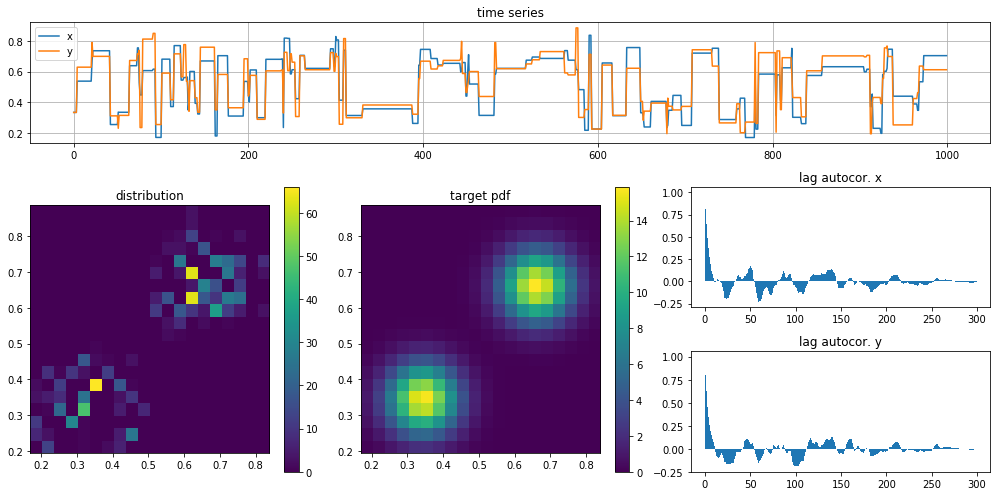

In [3]:
# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

# by default the range for Uniform ins [0, 1]^ndim
proposal = densities.Uniform(ndim)
sampler = DefaultMetropolis(ndim, target.pdf, proposal.proposal, proposal.pdf)

# sample
t_start = timer()
sample = sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

# print info
print('time: ', t_end - t_start)
print('pdf calls: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample  # show sample

## Adaptive Metropolis

Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  0.6030430629907642
pdf calss:  2000
pot_gradient calls:  0


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.49649457 0.50383154],[0.02686689 0.0313824 ],None,0.192


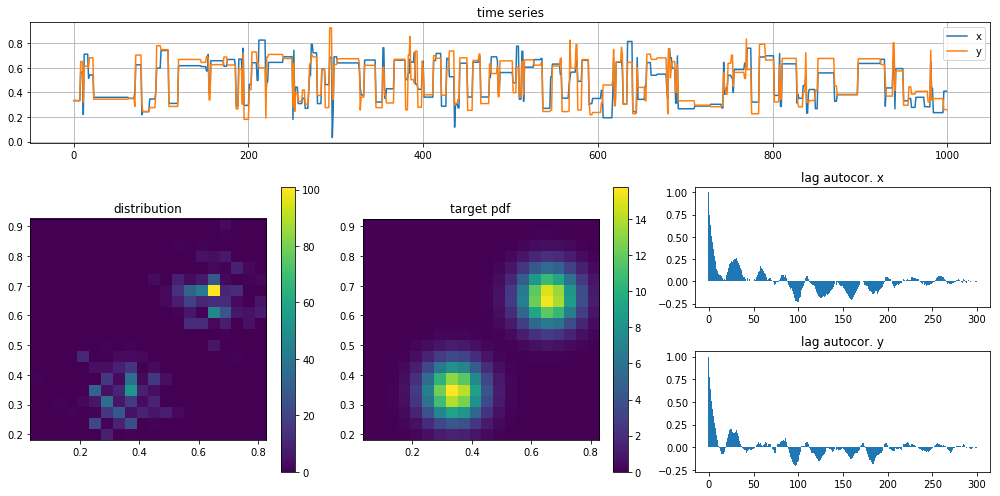

In [4]:
nadapt = 1000
nburnin = 1000

# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

# hast to be a proposal with cov attribute
# this is what adaptive metropolis modifies
proposal = densities.Gaussian(ndim, mu=0.5, cov=0.005)
metropolis_sampler = AdaptiveMetropolisUpdate(
    ndim, target.pdf, proposal, t_initial=100,
    adapt_schedule=lambda t: t <= nadapt)

# burn in
metropolis_sampler.sample(nburnin, start, log_every=0)
metropolis_sampler.is_adaptive = False  # turn adaptation off

t_start = timer()
sample = metropolis_sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

print('time: ', t_end - t_start)
print('pdf calss: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample

## Hamiltonian Updates
Hamiltonian updates take densities as argument, and therefore don't require a dedicated ndim argument.

Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  9.198350110993488
pdf calss:  11989
pot_gradient calls:  21978


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.44303988 0.44550515],[0.02906376 0.02836855],None,0.98


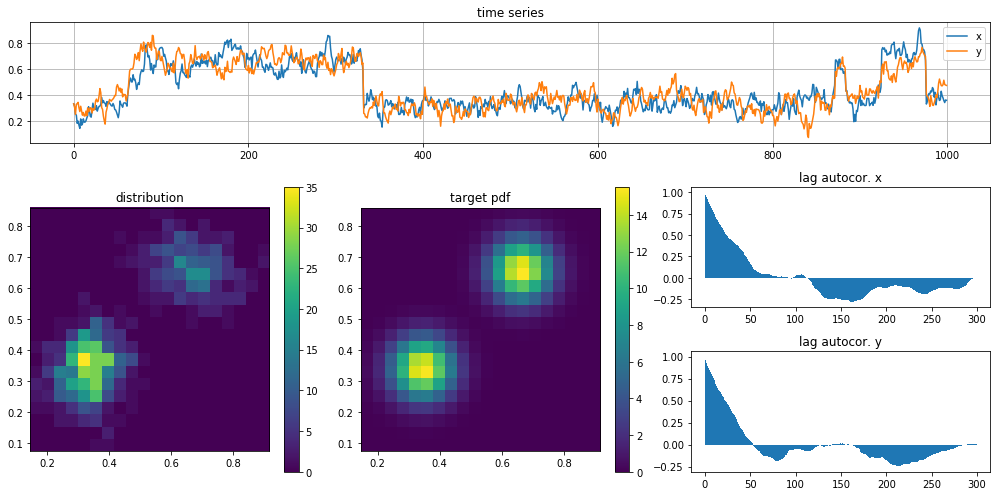

In [6]:
step_size = 0.04
steps = 10

# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

momentum_dist = densities.Gaussian(ndim, scale=1)
sampler = hamiltonian.HamiltonianUpdate(target, momentum_dist, steps, step_size)

t_start = timer()
sample = sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

print('time: ', t_end - t_start)
print('pdf calss: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample

## Dual Averaging HMC

Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  2.367869260997395
pdf calss:  3001
pot_gradient calls:  74068


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.41426738 0.40827052],[0.0233054 0.02383928],None,0.475


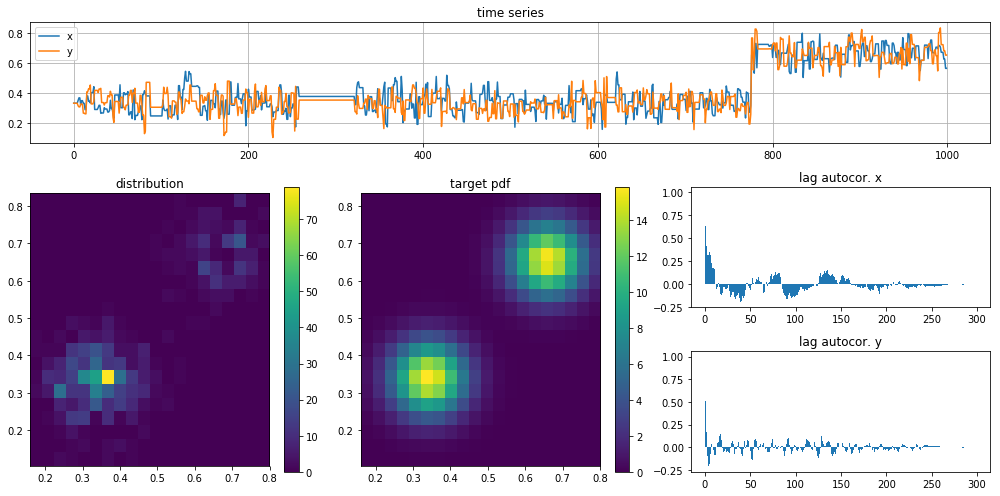

In [45]:
nadapt = 1000

def adapt_schedule(t):
    return t <= nadapt

# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

momentum_dist = densities.Gaussian(ndim, scale=.05)
sampler = hamiltonian.DualAveragingHMC(target, momentum_dist, 1, adapt_schedule)

t_start = timer()
sample = sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

print('time: ', t_end - t_start)
print('pdf calss: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample

## No-U-turn sampler

/home/mathis/Dev/bachelor/main/monte_carlo/hamiltonian/nuts.py:83: RuntimeWarning: invalid value encountered in true_divide
  if np.random.uniform() < n_2prime/(n_prime + n_2prime):


Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  26.270001637007226
pdf calss:  44830
pot_gradient calls:  48622


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.33430526 0.33322142],[0.00206525 0.00197721],None,0.964


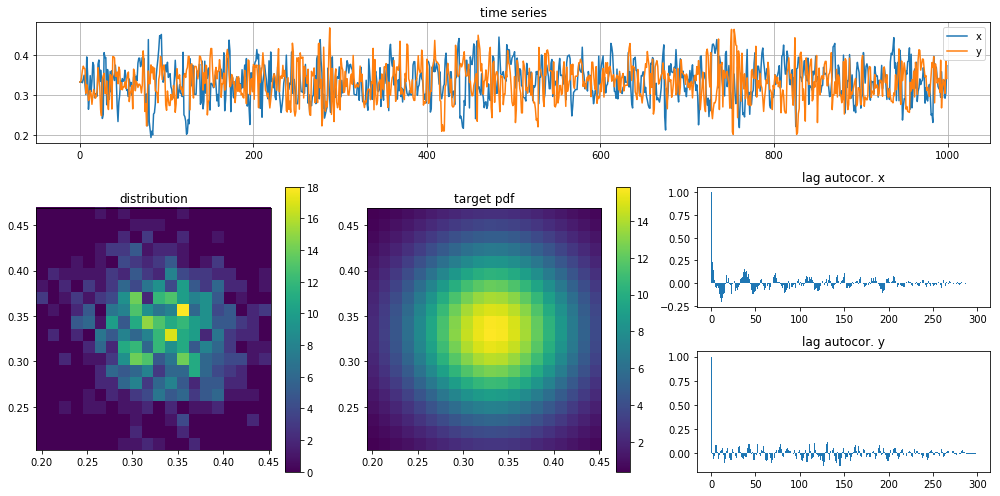

In [61]:
nadapt = 100

def adapt_schedule(t):
    return t <= nadapt

# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

momentum_dist = densities.Gaussian(ndim, scale=50)
sampler = hamiltonian.NUTSUpdate(target, momentum_dist, adapt_schedule)

t_start = timer()
sample = sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

print('time: ', t_end - t_start)
print('pdf calss: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample

## Spherical HMC
Sampling is by implementation restrained to $[0, 1]^{ndim}$.

Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  5.822020682011498
pdf calss:  8907
pot_gradient calls:  61940


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.42948108 0.42396018],[0.02476874 0.02919449],None,0.346


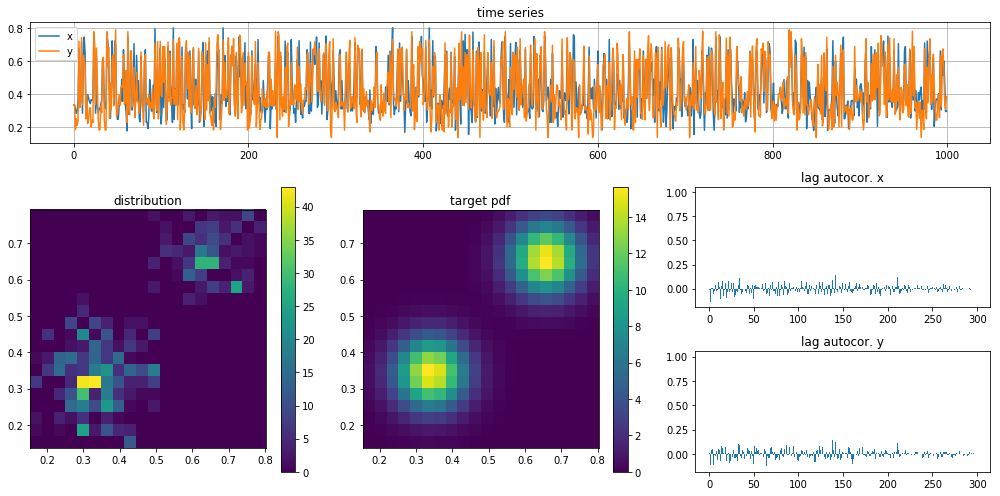

In [63]:
# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

sampler = hamiltonian.StaticSphericalHMC(target, 0.01, 1, 1, 15)

t_start = timer()
sample = sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

print('time: ', t_end - t_start)
print('pdf calss: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample

## Spherical NUTS

Generated 250 samples.
Generated 500 samples.
Generated 750 samples.
Generated 1000 samples.
time:  8.160406437993515
pdf calss:  17846
pot_gradient calls:  70361


Data (size),mean,variance,effective sample size,acceptance rate
1000,[0.39769866 0.39527089],[0.02124633 0.02126359],None,0.953


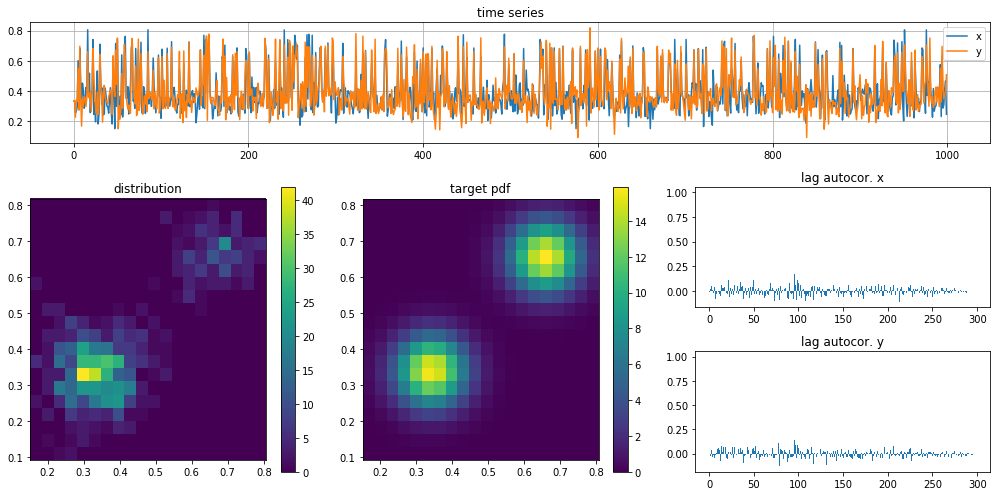

In [64]:
nadapt = 100

def adapt_schedule(t):
    return t <= nadapt

# reset counts
target.pdf.count = 0
target.pdf.pot_gradient = 0

sampler = hamiltonian.SphericalNUTS(target, adapt_schedule)

t_start = timer()
sample = sampler.sample(nsamples, start, log_every=nsamples/4)
t_end = timer()

print('time: ', t_end - t_start)
print('pdf calss: ', target.pdf.count)
print('pot_gradient calls: ', target.pot_gradient.count)
sample

# Importance Sampling - Metropolis

Data (size),mean,variance,effective sample size
1000,[0.49519945 0.50025644],[0.03807795 0.03763368],None


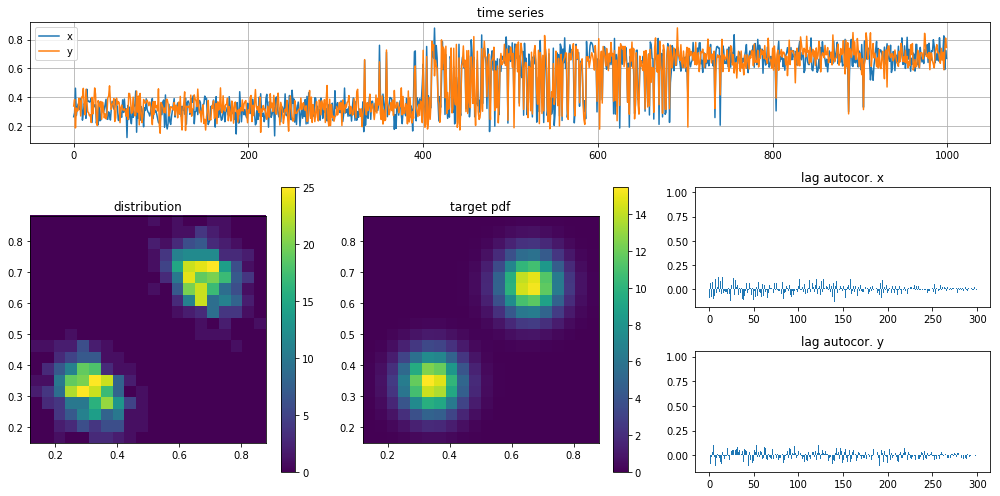

In [4]:
nopt = 1000  # integration steps

# imperfect channels
channels = MultiChannel([
    densities.Gaussian(ndim, mu=1/5, cov=0.005),
    densities.Gaussian(ndim, mu=4/5, cov=0.005)])

# multi channel integrator
importance = MultiChannelMC(channels)

t_start = timer()
integration_sample = importance(target, [], [nopt], []) # integrate

bound = np.max(integration_sample.function_values / integration_sample.weights) * 2
sampler = AcceptRejectSampler(target, bound, ndim, channels.rvs, channels)
sample = sampler.sample(nsamples)
t_end = timer()

sample